In [25]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

import tensorflow as tf

In [4]:
# source operations
a = tf.constant([2])
b = tf.constant([3])

c = tf.add(a,b)

with tf.Session() as session:
    result = session.run(c)
    print(result)

[5]


In [7]:
scalar = tf.constant([2])
vector = tf.constant([5, 6, 2])
matrix = tf.constant([ [1, 2, 3], [2, 3, 4], [3, 4, 5] ])
tensor = tf.constant([ [[1,2,3], [2,3,4], [3,4,5]], 
                      [[2,3,4], [3,4,5], [4,5,6]],
                      [[3,4,5], [4,5,6], [5,6,7]] ])
with tf.Session() as session:
    result = session.run(scalar)
    print('Scalar: \n{}\n'.format(result))
    result = session.run(vector)
    print('Vector: \n{}\n'.format(result))
    result = session.run(matrix)
    print('Matrix: \n{}\n'.format(result))
    result = session.run(tensor)
    print('Tensor: \n{}\n'.format(result))

Scalar: 
[2]

Vector: 
[5 6 2]

Matrix: 
[[1 2 3]
 [2 3 4]
 [3 4 5]]

Tensor: 
[[[1 2 3]
  [2 3 4]
  [3 4 5]]

 [[2 3 4]
  [3 4 5]
  [4 5 6]]

 [[3 4 5]
  [4 5 6]
  [5 6 7]]]



# Variables

In [14]:
state = tf.Variable(0)
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

# variables must be initialized after launching the graph
# add initialization op to graph
init_op = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init_op)
    print(session.run(state))
    for _ in range(3):
        session.run(update)
        print(session.run(state))

0
1
2
3


# Placeholder

In [15]:
a = tf.placeholder(tf.float32)
b = a*a

with tf.Session() as session:
    result = session.run(b, feed_dict={a:3.5})
    print(result)

12.25


# Linear Regression

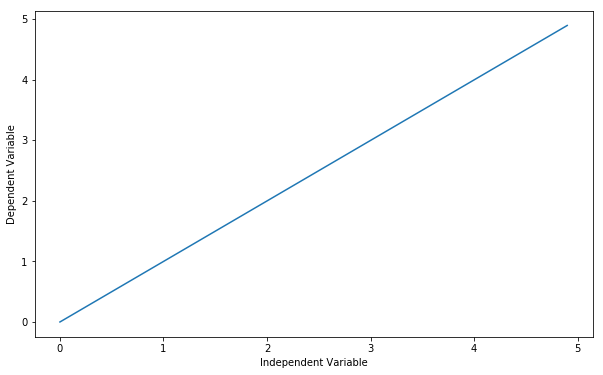

In [20]:
X = np.arange(0, 5, 0.1)
a = 1
b = 0

Y = a*X + b

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show();

In [21]:
X_data = np.random.rand(100).astype(np.float32)
Y_data = 3*X_data + 2

# add Gaussian noise
Y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(Y_data)

In [47]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
Y = a*X_data + b

# In linear regression we minimize the squared error 
loss = tf.reduce_mean( tf.square(Y-Y_data) )

optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

init_op = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init_op)
    
    train_data = []
    for step in range(501):
        evals = session.run([train, a, b])[1:]
        if step%30==0:
            print(step, evals)
            train_data.append(evals)

0 [1.3191357, 0.76427895]
30 [2.4730215, 2.2950373]
60 [2.6393461, 2.2051973]
90 [2.7495968, 2.1454351]
120 [2.8227365, 2.1057887]
150 [2.8712573, 2.0794876]
180 [2.9034457, 2.0620394]
210 [2.9247994, 2.0504646]
240 [2.9389656, 2.0427859]
270 [2.9483638, 2.0376914]
300 [2.9545982, 2.0343118]
330 [2.958734, 2.0320699]
360 [2.9614778, 2.0305827]
390 [2.9632981, 2.0295961]
420 [2.964505, 2.0289419]
450 [2.9653063, 2.0285075]
480 [2.9658375, 2.0282195]


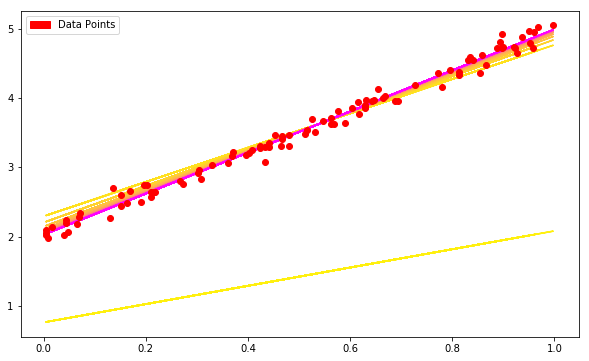

In [48]:
converter = plt.colors
cr, cg, cb = 1.0, 1.0, 0.0
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb>1.0: cb=1.0
    if cg<0.0: cg=0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(X_data)
    line = plt.plot(X_data, f_y)
    plt.setp(line, color=(cr, cg, cb))
    
plt.plot(X_data, Y_data, 'ro')

green_line = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line])

plt.show();

# Logistic Regression